
# Business Case

- Evaluate the value of the data and leverage it to build a content recommender to improve personalized customer experience.


# Occam's Razor Approach

- Looked at XM only (86%) of users
    - Provided details XM users only
        - All columns less than 1% missing data 
        - Created a column that tells us the count of 'tuner' field for the 'main' population for this interation
        
        
- Simplest solution is the best solution
    - Saves computational power
    - Allows for collaboration and feedback with business
        - Don't want to spend months on project without providing updates and receiving feedback from stakeholders and/or SMEs
    - Iterative process 
        - Provide bottom line up front and can continue to improve analysis/model versions


# Outline 
- Exploratory Data Analysis (EDA) Understanding the Data
    - Import Each Dataset (A,B)
    - Lenght, Width, Description, Dataset Total
    - Summary Statistics 
    - Frequency Tables
    - Formating Columns 
    - Missing Data
    - Aggregating Columns to Have Cleaner Dataset for Modeling and Joing with other Dataframe (attachment A)


# Data Details
- ## Attachment A

    - ID – Unique identifier of trialers.
    - Trial Start Date 
    - Trial End Date
    - Conversion = 1/0 Indicator of whether the trialer became a paying subscribers
 

- ## Attachment B 
    - #### The sample was sent to the Automotive partner and they sent back a dataset that represent all the vehicle consumption data between Trial Start and Trial End date for the 1,000 New Car trialers. 

    - ID – This is the unique identifier of trialers that the vendor passed back to SXM
    
    - Storedtime – The timestamp of the vehicle status
    - Odometer – This is the odometer reading (in km) at Storedtime
    - Infotainment Data Source – The information input source at Storedtime
    - XM Channel – Sirius XM channel number at Storedtime, only relevant if Infotainment Data Source = ‘XM’
    - Mute Flag – whether infotainment unit was muted at Storedtime


# Missing Data 
- Depending on how large the missing values are, they can be deleted
    - Easy way if low percentages 
    - Must document and ask why are there so many missing values?
        - Example
            - Bad data entry/ certain years don't have good data/ some customers have hand written process and leaves room for human error



In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

<div id="Link1"></div>





# Import Data and Clean Attachment A & B 


In [2]:
df_a= pd.read_csv('ListenerDataCaseStudy_AttachmentA.txt')

In [3]:
df_a.head()

,ID,Trial_Start_Date,Trial_End_Date,conversion
0,1,04/14/2018,07/14/2018,1
1,2,05/04/2018,08/04/2018,1
2,3,04/19/2018,07/19/2018,1
3,4,04/27/2018,07/27/2018,1
4,5,04/14/2018,07/14/2018,0


In [4]:
#df_a and df_b have different upper/lowercase for easier join
df_a.columns = df_a.columns.str.lower()

In [5]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
id                  1000 non-null int64
trial_start_date    1000 non-null object
trial_end_date      1000 non-null object
conversion          1000 non-null int64
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [6]:
#check count rows and colomn count 
print(df_a.shape)

(1000, 4)


In [7]:
#created date_difference for joining this with attachment B later
#and understand the basic details on this sample size 

In [8]:
df_a['start_date']=pd.to_datetime(df_a['trial_start_date'], format='%m/%d/%Y')
df_a['end_date']=pd.to_datetime(df_a['trial_end_date'], format='%m/%d/%Y')
df_a['date_difference']=df_a.end_date - df_a.start_date

In [9]:
df_a

,id,trial_start_date,trial_end_date,conversion,start_date,end_date,date_difference
0,1,04/14/2018,07/14/2018,1,2018-04-14,2018-07-14,91 days
1,2,05/04/2018,08/04/2018,1,2018-05-04,2018-08-04,92 days
2,3,04/19/2018,07/19/2018,1,2018-04-19,2018-07-19,91 days
3,4,04/27/2018,07/27/2018,1,2018-04-27,2018-07-27,91 days
4,5,04/14/2018,07/14/2018,0,2018-04-14,2018-07-14,91 days
...,...,...,...,...,...,...,...
995,996,04/13/2018,07/13/2018,0,2018-04-13,2018-07-13,91 days
996,997,04/12/2018,07/12/2018,0,2018-04-12,2018-07-12,91 days
997,998,04/19/2018,07/19/2018,0,2018-04-19,2018-07-19,91 days
998,999,04/19/2018,07/19/2018,0,2018-04-19,2018-07-19,91 days


In [10]:
df_a['conversion'].value_counts()

0    731
1    269
Name: conversion, dtype: int64

In [11]:
#percent of A that became subscribers
df_a.conversion.value_counts(normalize=True) 

0    0.731
1    0.269
Name: conversion, dtype: float64

In [12]:
# Majority (75%) of sample from attachment a have 91 day subscription 
# Other users have one day increase of subscription (92,93,94)
df_a['date_difference'].value_counts()

91 days    751
92 days    168
93 days     71
94 days     10
Name: date_difference, dtype: int64

In [13]:
df_a.date_difference.value_counts(normalize=True) 

91 days    0.751
92 days    0.168
93 days    0.071
94 days    0.010
Name: date_difference, dtype: float64

In [14]:
df_a['subscribers'] = (df_a.conversion == 1)

In [15]:
df_a

,id,trial_start_date,trial_end_date,conversion,start_date,end_date,date_difference,subscribers
0,1,04/14/2018,07/14/2018,1,2018-04-14,2018-07-14,91 days,True
1,2,05/04/2018,08/04/2018,1,2018-05-04,2018-08-04,92 days,True
2,3,04/19/2018,07/19/2018,1,2018-04-19,2018-07-19,91 days,True
3,4,04/27/2018,07/27/2018,1,2018-04-27,2018-07-27,91 days,True
4,5,04/14/2018,07/14/2018,0,2018-04-14,2018-07-14,91 days,False
...,...,...,...,...,...,...,...,...
995,996,04/13/2018,07/13/2018,0,2018-04-13,2018-07-13,91 days,False
996,997,04/12/2018,07/12/2018,0,2018-04-12,2018-07-12,91 days,False
997,998,04/19/2018,07/19/2018,0,2018-04-19,2018-07-19,91 days,False
998,999,04/19/2018,07/19/2018,0,2018-04-19,2018-07-19,91 days,False


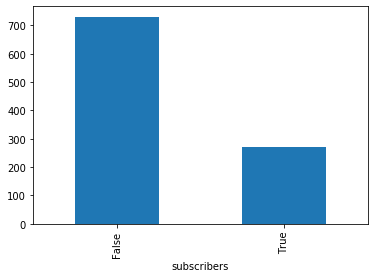

In [16]:
df_a.groupby('subscribers').id.count().plot(kind='bar')
plt.show()

In [17]:
# checking the conversion rate to subsrcibers yes by trial days
pd.crosstab(df_a.subscribers,df_a.date_difference)

date_difference,91 days,92 days,93 days,94 days
subscribers,,,,
False,549,126,49,7
True,202,42,22,3


In [18]:
# why do the most start dates for this sample of 4/2018 have more towards of the month
df_a['start_date'].value_counts()

2018-04-30    68
2018-04-28    65
2018-04-14    57
2018-04-12    55
2018-04-21    49
2018-04-07    47
2018-04-16    45
2018-04-23    43
2018-04-26    42
2018-04-27    35
2018-04-18    33
2018-05-05    31
2018-05-04    29
2018-04-25    26
2018-05-07    25
2018-04-13    25
2018-04-19    25
2018-04-20    24
2018-04-06    24
2018-04-05    21
2018-04-09    21
2018-04-24    21
2018-05-03    18
2018-05-08    17
2018-05-09    17
2018-04-17    17
2018-04-04    13
2018-04-11    13
2018-04-10    12
2018-05-02    11
2018-05-01    11
2018-04-15    10
2018-04-22    10
2018-04-29     9
2018-04-08     7
2018-04-03     6
2018-03-31     5
2018-05-06     4
2018-04-02     4
2018-03-30     3
2018-03-29     1
2018-04-01     1
Name: start_date, dtype: int64

In [19]:
df_a.start_date.value_counts(normalize=True) 

2018-04-30    0.068
2018-04-28    0.065
2018-04-14    0.057
2018-04-12    0.055
2018-04-21    0.049
2018-04-07    0.047
2018-04-16    0.045
2018-04-23    0.043
2018-04-26    0.042
2018-04-27    0.035
2018-04-18    0.033
2018-05-05    0.031
2018-05-04    0.029
2018-04-25    0.026
2018-05-07    0.025
2018-04-13    0.025
2018-04-19    0.025
2018-04-20    0.024
2018-04-06    0.024
2018-04-05    0.021
2018-04-09    0.021
2018-04-24    0.021
2018-05-03    0.018
2018-05-08    0.017
2018-05-09    0.017
2018-04-17    0.017
2018-04-04    0.013
2018-04-11    0.013
2018-04-10    0.012
2018-05-02    0.011
2018-05-01    0.011
2018-04-15    0.010
2018-04-22    0.010
2018-04-29    0.009
2018-04-08    0.007
2018-04-03    0.006
2018-03-31    0.005
2018-05-06    0.004
2018-04-02    0.004
2018-03-30    0.003
2018-03-29    0.001
2018-04-01    0.001
Name: start_date, dtype: float64

## Attachment B

In [20]:
df_b= pd.read_csv('ListenerDataCaseStudy_AttachmentB.txt')

In [21]:
df_b.head()

,id,storedtime,odometer_km,infotainment_data_source,xm_channel,tuner,muteflg
0,137,05/04/2018 3:26:14 PM,175.906250,Tuner,255.0,FM,False
1,840,04/07/2018 8:56:59 PM,147.750000,"External Digital Media (USB Drive, iPod)",255.0,FM,False
2,448,05/11/2018 7:00:57 PM,666.203125,NaN,NaN,NaN,NaN
3,308,04/06/2018 5:06:19 PM,191.171875,Tuner,255.0,FM,False
4,25,04/20/2018 11:26:51 AM,680.453125,None,255.0,XM,False


In [22]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062983 entries, 0 to 2062982
Data columns (total 7 columns):
id                          int64
storedtime                  object
odometer_km                 float64
infotainment_data_source    object
xm_channel                  float64
tuner                       object
muteflg                     object
dtypes: float64(2), int64(1), object(4)
memory usage: 110.2+ MB


In [23]:
#check count rows and colomn count 
print(df_b.shape)

(2062983, 7)


In [24]:
#1,000 unique ids in attachment b 
df_b['id'].value_counts()

728    10422
161     9811
457     9528
502     8718
495     7767
       ...  
962       16
167       13
555        9
701        6
224        2
Name: id, Length: 1000, dtype: int64

# Missing
## Attachment B is the only file with missing values

### Ways to handle missing values (usually don't want to drop large missing values)
- Drop the variable
- Drop the observation(s)
- Missing Value Imputation

In [25]:
#both columns and rows missing
df_a.isnull().sum().sum()

0

In [26]:
#both columns and rows missing
df_b.isnull().sum().sum()

1860984

In [27]:
percent_missing = df_b.isnull().sum() * 100 / len(df_b)
missing_value_df_b = pd.DataFrame({'column_name': df_b.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df_b)

                                       column_name  percent_missing
id                                              id         0.000000
storedtime                              storedtime         0.000000
odometer_km                            odometer_km         1.396812
infotainment_data_source  infotainment_data_source        22.210265
xm_channel                              xm_channel        22.206145
tuner                                        tuner        22.197953
muteflg                                    muteflg        22.197226


# Business Case:

1. Perform data exploration and engineering on attachment B which includes but not limited to hygiene/cleansing, aggregation.

### df_b2 is has no missing values because there was less that 1% missing when filtered for XM channel

## aggregated attachment B (df_b) for EDA and make the join with attachment A (df_a) more meaningful results

## Attachment B

### The counts below show the occurance of each ID (unique identifier of trialers )

### - There are 1,000 uniuqe IDs

In [28]:
df_b['id'].value_counts()

728    10422
161     9811
457     9528
502     8718
495     7767
       ...  
962       16
167       13
555        9
701        6
224        2
Name: id, Length: 1000, dtype: int64

In [29]:
df_b['storedtime'].value_counts()

05/31/2018 5:00:51 PM     7
05/26/2018 5:34:28 PM     7
06/21/2018 3:58:30 PM     7
06/14/2018 2:07:59 AM     6
06/12/2018 9:20:03 PM     6
                         ..
07/07/2018 1:51:55 AM     1
05/25/2018 8:55:17 PM     1
07/14/2018 12:27:41 PM    1
07/29/2018 8:52:21 PM     1
04/16/2018 7:02:42 PM     1
Name: storedtime, Length: 1749177, dtype: int64

In [31]:
df_b['infotainment_data_source'].value_counts(dropna=False)

NaN                                         458194
XM                                          452569
Tuner                                       435741
External Digital Media (USB Drive, iPod)    322375
None                                        312514
Phone (Bluetooth)                            65125
CD                                            8198
Wireless Digital Media (Bluetooth-A2DP)       5331
Front Aux                                     2550
RSE                                            386
Name: infotainment_data_source, dtype: int64

In [30]:
df_b['xm_channel'].value_counts(dropna=False)

255.0    1058372
NaN       458109
56.0       28258
58.0       23502
1.0        20398
          ...   
199.0          1
197.0          1
191.0          1
134.0          1
166.0          1
Name: xm_channel, Length: 204, dtype: int64

In [31]:
df_b['tuner'].value_counts()

FM       775777
XM       619884
FM HD    142512
AM        63448
AM HD      3422
Name: tuner, dtype: int64

In [32]:
df_b.tuner.value_counts(normalize=True) 

FM       0.483337
XM       0.386210
FM HD    0.088790
AM       0.039530
AM HD    0.002132
Name: tuner, dtype: float64

In [33]:
df_b['muteflg'].value_counts()

False    1465516
True      139542
Name: muteflg, dtype: int64

In [34]:
#91 percent of time mute is not used
#Do we care about if it is muted? If so, why?
df_b.muteflg.value_counts(normalize=True) 

False    0.913061
True     0.086939
Name: muteflg, dtype: float64

In [35]:
#Create field for xm channels
df_b['tuner_count'] = df_b['tuner'].map({'FM':1,'XM':2,'FM HD':3,'AM':4,'AM HD':5})


In [36]:
df_b.head()

,id,storedtime,odometer_km,infotainment_data_source,xm_channel,tuner,muteflg,tuner_count
0,137,05/04/2018 3:26:14 PM,175.906250,Tuner,255.0,FM,False,1.0
1,840,04/07/2018 8:56:59 PM,147.750000,"External Digital Media (USB Drive, iPod)",255.0,FM,False,1.0
2,448,05/11/2018 7:00:57 PM,666.203125,NaN,NaN,NaN,NaN,NaN
3,308,04/06/2018 5:06:19 PM,191.171875,Tuner,255.0,FM,False,1.0
4,25,04/20/2018 11:26:51 AM,680.453125,None,255.0,XM,False,2.0


In [37]:
df_b.isna().sum()

id                               0
storedtime                       0
odometer_km                  28816
infotainment_data_source    458194
xm_channel                  458109
tuner                       457940
muteflg                     457925
tuner_count                 457940
dtype: int64

# Main Population Group XM for FIrst Iteration

### 86% of Data from 1,000 Unique ID Users

In [38]:
df_b = df_b.loc[(df_b.tuner == "XM")]

In [39]:
df_b

,id,storedtime,odometer_km,infotainment_data_source,xm_channel,tuner,muteflg,tuner_count
4,25,04/20/2018 11:26:51 AM,680.453125,None,255.0,XM,False,2.0
21,91,04/20/2018 7:39:10 PM,183.250000,None,255.0,XM,False,2.0
22,601,04/20/2018 9:54:17 PM,3683.312500,"External Digital Media (USB Drive, iPod)",255.0,XM,False,2.0
24,9,04/09/2018 7:29:58 PM,482.765625,XM,26.0,XM,False,2.0
28,423,04/11/2018 3:10:58 PM,102.093750,None,255.0,XM,False,2.0
...,...,...,...,...,...,...,...,...
2062969,988,07/23/2018 11:40:28 PM,6410.437500,XM,59.0,XM,False,2.0
2062970,988,07/23/2018 11:45:29 PM,6414.515625,XM,59.0,XM,False,2.0
2062971,988,07/23/2018 11:50:30 PM,6416.890625,XM,59.0,XM,False,2.0
2062972,988,07/23/2018 11:55:31 PM,6421.234375,XM,59.0,XM,False,2.0


In [40]:
df_b['muteflg'].value_counts()

False    567729
True      51227
Name: muteflg, dtype: int64

In [41]:
#202 Unique XM channels
df_b['xm_channel'].value_counts()

255.0    186475
56.0      25056
58.0      22112
61.0      19257
6.0       16553
          ...  
200.0         1
233.0         1
191.0         1
229.0         1
225.0         1
Name: xm_channel, Length: 202, dtype: int64

In [42]:
#858 Uniuqe IDs 
#87% of the ID (users use XM) there are 1000 unique users with attachment A
df_b['id'].value_counts()

728    3940
37     3416
927    3258
483    3257
633    3236
       ... 
534       1
186       1
722       1
245       1
31        1
Name: id, Length: 886, dtype: int64

In [43]:
#Notice how low missing values are with main population
percent_missing = df_b.isnull().sum() * 100 / len(df_b)
missing_value_df_b = pd.DataFrame({'column_name': df_b.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df_b)

                                       column_name  percent_missing
id                                              id         0.000000
storedtime                              storedtime         0.000000
odometer_km                            odometer_km         0.182776
infotainment_data_source  infotainment_data_source         0.117280
xm_channel                              xm_channel         0.192778
tuner                                        tuner         0.000000
muteflg                                    muteflg         0.149705
tuner_count                            tuner_count         0.000000


In [44]:
df_b.head()

,id,storedtime,odometer_km,infotainment_data_source,xm_channel,tuner,muteflg,tuner_count
4,25,04/20/2018 11:26:51 AM,680.453125,None,255.0,XM,False,2.0
21,91,04/20/2018 7:39:10 PM,183.250000,None,255.0,XM,False,2.0
22,601,04/20/2018 9:54:17 PM,3683.312500,"External Digital Media (USB Drive, iPod)",255.0,XM,False,2.0
24,9,04/09/2018 7:29:58 PM,482.765625,XM,26.0,XM,False,2.0
28,423,04/11/2018 3:10:58 PM,102.093750,None,255.0,XM,False,2.0


# Per Instructions, Spent Most Time on EDA on Attachment B
## Joined with SiriuXM Representative Sample

In [45]:
df_ab=pd.merge(df_b,df_a,on='id')
df_ab

,id,storedtime,odometer_km,infotainment_data_source,xm_channel,tuner,muteflg,tuner_count,trial_start_date,trial_end_date,conversion,start_date,end_date,date_difference,subscribers
0,25,04/20/2018 11:26:51 AM,680.453125,None,255.0,XM,False,2.0,04/14/2018,07/14/2018,0,2018-04-14,2018-07-14,91 days,False
1,25,07/10/2018 11:04:43 PM,4533.343750,XM,13.0,XM,False,2.0,04/14/2018,07/14/2018,0,2018-04-14,2018-07-14,91 days,False
2,25,06/08/2018 11:01:49 PM,3430.109375,XM,37.0,XM,False,2.0,04/14/2018,07/14/2018,0,2018-04-14,2018-07-14,91 days,False
3,25,07/03/2018 11:43:56 PM,4279.843750,XM,13.0,XM,False,2.0,04/14/2018,07/14/2018,0,2018-04-14,2018-07-14,91 days,False
4,25,04/24/2018 11:45:25 AM,839.328125,XM,57.0,XM,False,2.0,04/14/2018,07/14/2018,0,2018-04-14,2018-07-14,91 days,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619879,964,05/30/2018 3:54:25 AM,4046.437500,XM,64.0,XM,False,2.0,04/04/2018,07/04/2018,0,2018-04-04,2018-07-04,91 days,False
619880,964,05/29/2018 8:45:14 PM,4012.093750,XM,64.0,XM,False,2.0,04/04/2018,07/04/2018,0,2018-04-04,2018-07-04,91 days,False
619881,964,05/30/2018 1:32:52 AM,4029.453125,XM,64.0,XM,False,2.0,04/04/2018,07/04/2018,0,2018-04-04,2018-07-04,91 days,False
619882,964,05/30/2018 11:54:06 PM,4048.703125,XM,64.0,XM,False,2.0,04/04/2018,07/04/2018,0,2018-04-04,2018-07-04,91 days,False


# More EDA

In [51]:
# odemeter is not correlated to any channels or count of channels listed to for df_b
df_b.select_dtypes(['float64' , 'int64']).corr()

""


In [84]:
df_b.corr()

,id,odometer_km,xm_channel,tuner_count
id,1.000000,-0.007114,-0.009058,-0.010131
odometer_km,-0.007114,1.000000,0.013288,-0.034587
xm_channel,-0.009058,0.013288,1.000000,-0.159592
tuner_count,-0.010131,-0.034587,-0.159592,1.000000


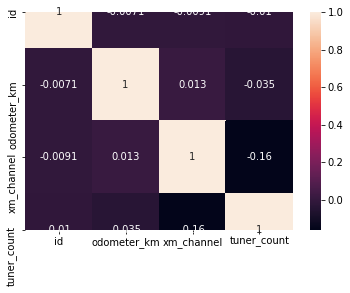

In [85]:
sns.heatmap(df_b.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

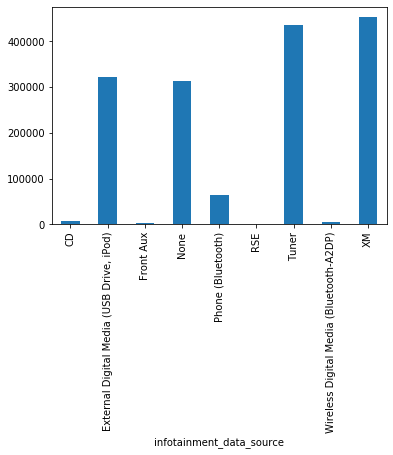

In [89]:
df_b.groupby('infotainment_data_source').infotainment_data_source.count().plot(kind='bar')
plt.show()

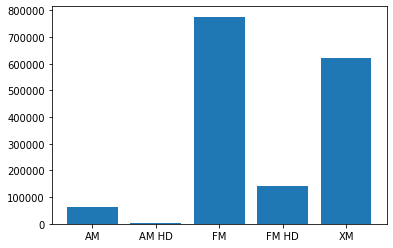

In [70]:
summary=df_b.groupby('tuner').id.count()
plt.bar(x=summary.index , height=summary.values)
plt.show()

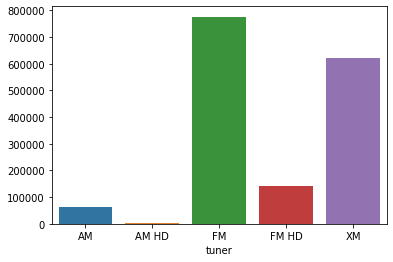

In [71]:
sns.barplot(x=summary.index , y=summary.values)
plt.show()

# Total occurances

In [49]:
#determine total occurances for most active IDs to later determine
#if they are most likely to become subsrcibers 
df_ab['total_id_counts'] = df_ab.groupby('id').id.transform('count')

In [50]:
#determine total occurances for most active IDs to later determine
#if they are most likely to become subsrcibers 
df_ab['total_id_counts'] = df_ab.groupby('id').id.transform('count')

In [51]:
df_ab

,id,storedtime,odometer_km,infotainment_data_source,xm_channel,tuner,muteflg,tuner_count,trial_start_date,trial_end_date,conversion,start_date,end_date,date_difference,subscribers,total_id_counts
0,25,04/20/2018 11:26:51 AM,680.453125,None,255.0,XM,False,2.0,04/14/2018,07/14/2018,0,2018-04-14,2018-07-14,91 days,False,517
1,25,07/10/2018 11:04:43 PM,4533.343750,XM,13.0,XM,False,2.0,04/14/2018,07/14/2018,0,2018-04-14,2018-07-14,91 days,False,517
2,25,06/08/2018 11:01:49 PM,3430.109375,XM,37.0,XM,False,2.0,04/14/2018,07/14/2018,0,2018-04-14,2018-07-14,91 days,False,517
3,25,07/03/2018 11:43:56 PM,4279.843750,XM,13.0,XM,False,2.0,04/14/2018,07/14/2018,0,2018-04-14,2018-07-14,91 days,False,517
4,25,04/24/2018 11:45:25 AM,839.328125,XM,57.0,XM,False,2.0,04/14/2018,07/14/2018,0,2018-04-14,2018-07-14,91 days,False,517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619879,964,05/30/2018 3:54:25 AM,4046.437500,XM,64.0,XM,False,2.0,04/04/2018,07/04/2018,0,2018-04-04,2018-07-04,91 days,False,51
619880,964,05/29/2018 8:45:14 PM,4012.093750,XM,64.0,XM,False,2.0,04/04/2018,07/04/2018,0,2018-04-04,2018-07-04,91 days,False,51
619881,964,05/30/2018 1:32:52 AM,4029.453125,XM,64.0,XM,False,2.0,04/04/2018,07/04/2018,0,2018-04-04,2018-07-04,91 days,False,51
619882,964,05/30/2018 11:54:06 PM,4048.703125,XM,64.0,XM,False,2.0,04/04/2018,07/04/2018,0,2018-04-04,2018-07-04,91 days,False,51
